# BundleQC, visualizing $N>1000$ white matter tracts at once for quality control

---------------------------


Chandio, B.Q., Chattopadhyay, T., Owens-Walton, C., Reina, J.E.V., Nabulsi, L., Thomopoulos, S.I., Guaje, J., Garyfallidis, E. and Thompson, P.M., 2022. Visualizing 4,230 White Matter Tracts at Once. ISMRM, London, England, UK. 





------------

In this tutorial we will project 4230 bundles extracted from 141 ADNI3[1] subjects (30 bundles from each subject) into latent space for visualization and quality control.

In [61]:
import glob, os
import numpy as np
import pandas as pd
from scipy import ndimage
import random
import matplotlib.pyplot as plt
import seaborn as sns
import umap.plot
import umap.umap_ as umap

<font size=4 color='brown'> We start by loading precomputed bundle distance matrix

In [5]:
files = glob.glob("dist_out/*.npy")
dist = []
for f in files:
    
    tmp = np.load(f)
    dist.extend(tmp)

In [126]:
np.array(dist).shape

(4230, 4230)

<font size=4 color='brown'> Let's visualize the matrix

It is a huge matrix of size (4230, 4230). Each row represents one subject's 30 (different types of) bundles' BMD[2] distance between every other subject's 30 bundles.
    
BMD stands for bundle-based minimum distance[2].

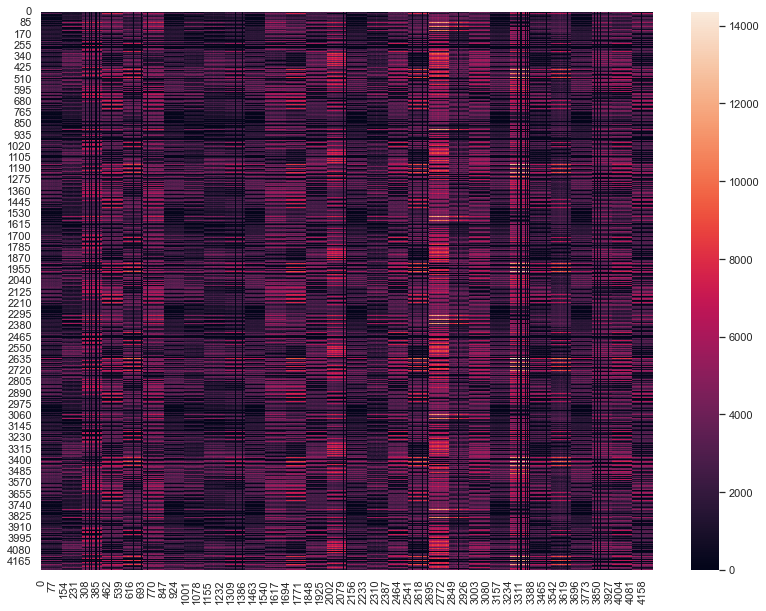

In [17]:
sns.set(rc={'figure.figsize':(13.7,10.27)})
ax = sns.heatmap(dist)

Let's zoom into first 30 subjects' bundles' BMD distance between every other subject's bundles

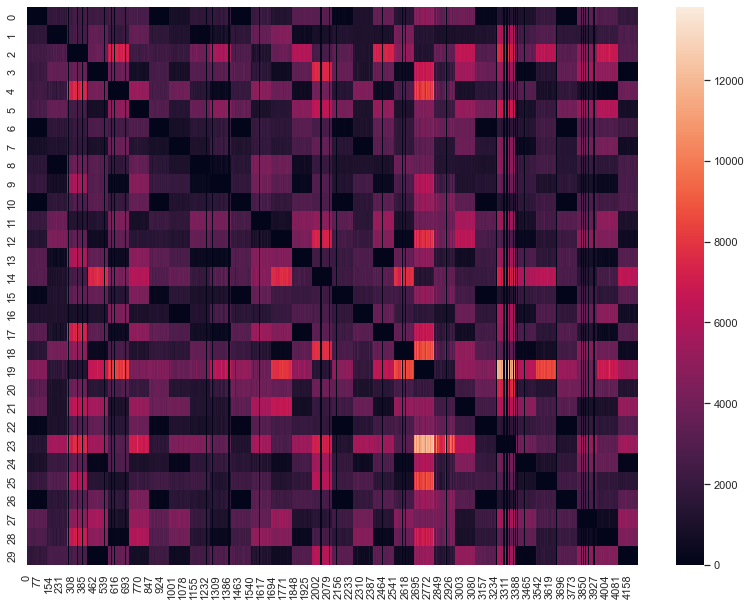

In [30]:
ax = sns.heatmap(dist[:][:30])

In [128]:
# label of each pixel
bundles = os.listdir('/Users/bramshqamarchandio/Desktop/bundles_p')
n = 141

l = []

for i in range(n):
    
    for b in bundles:
        
        l.append(b[:-4])
lb = []

for i in range(n):
    
    for b in range(0,30):
        
        lb.append(b)

We feed the precomputed distance matrix to UMAP (Uniform Manifold Approximation and Projection)[3] and project bundles into 2D embedding

In [60]:
reducer = umap.UMAP(n_components=2, random_state=42, verbose=False, n_neighbors=141)
reducer.fit(dist, lb)

densmap_supervised = reducer.transform(dist)

umap_result_df = pd.DataFrame({'umap_1': densmap_supervised[:,0],
                               'umap_2': densmap_supervised[:,1],
                               'label': l})

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/bramshqamarchandio/anaconda3/envs/umap/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


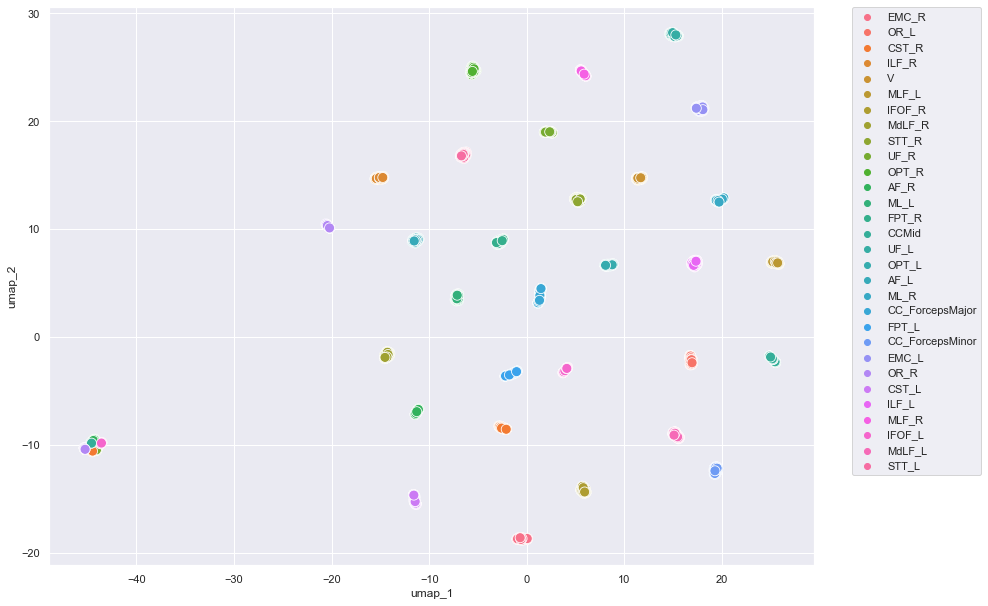

In [62]:
sns.scatterplot(data=umap_result_df, x="umap_1", y="umap_2", hue="label", s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<font size=4 color='brown'> We observe same type of bundles are placed together. We also find a cluster of mixed bundles at the left end of the plot. 

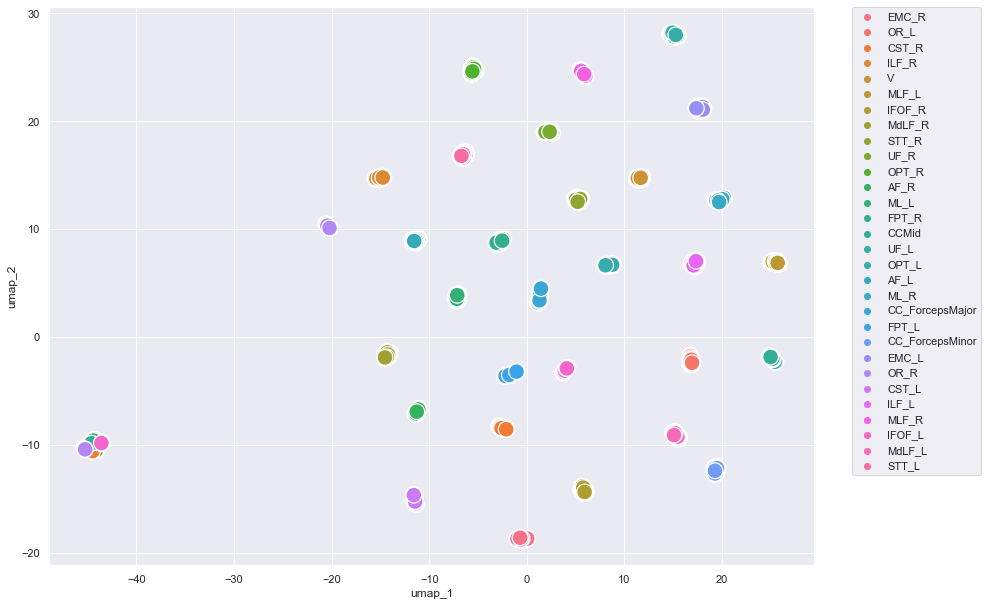

In [69]:
sns.scatterplot(data=umap_result_df, x="umap_1", y="umap_2", hue="label", s=250) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [65]:
from umap import plot

<font size=4 color='brown'> We can also use interactive visualization of the projection and zoom into cluster of mixed bundles

In [93]:
pl = plot.interactive(reducer, labels=l, hover_data=umap_result_df, point_size=8, color_key_cmap='tab10')
plot.show(pl)

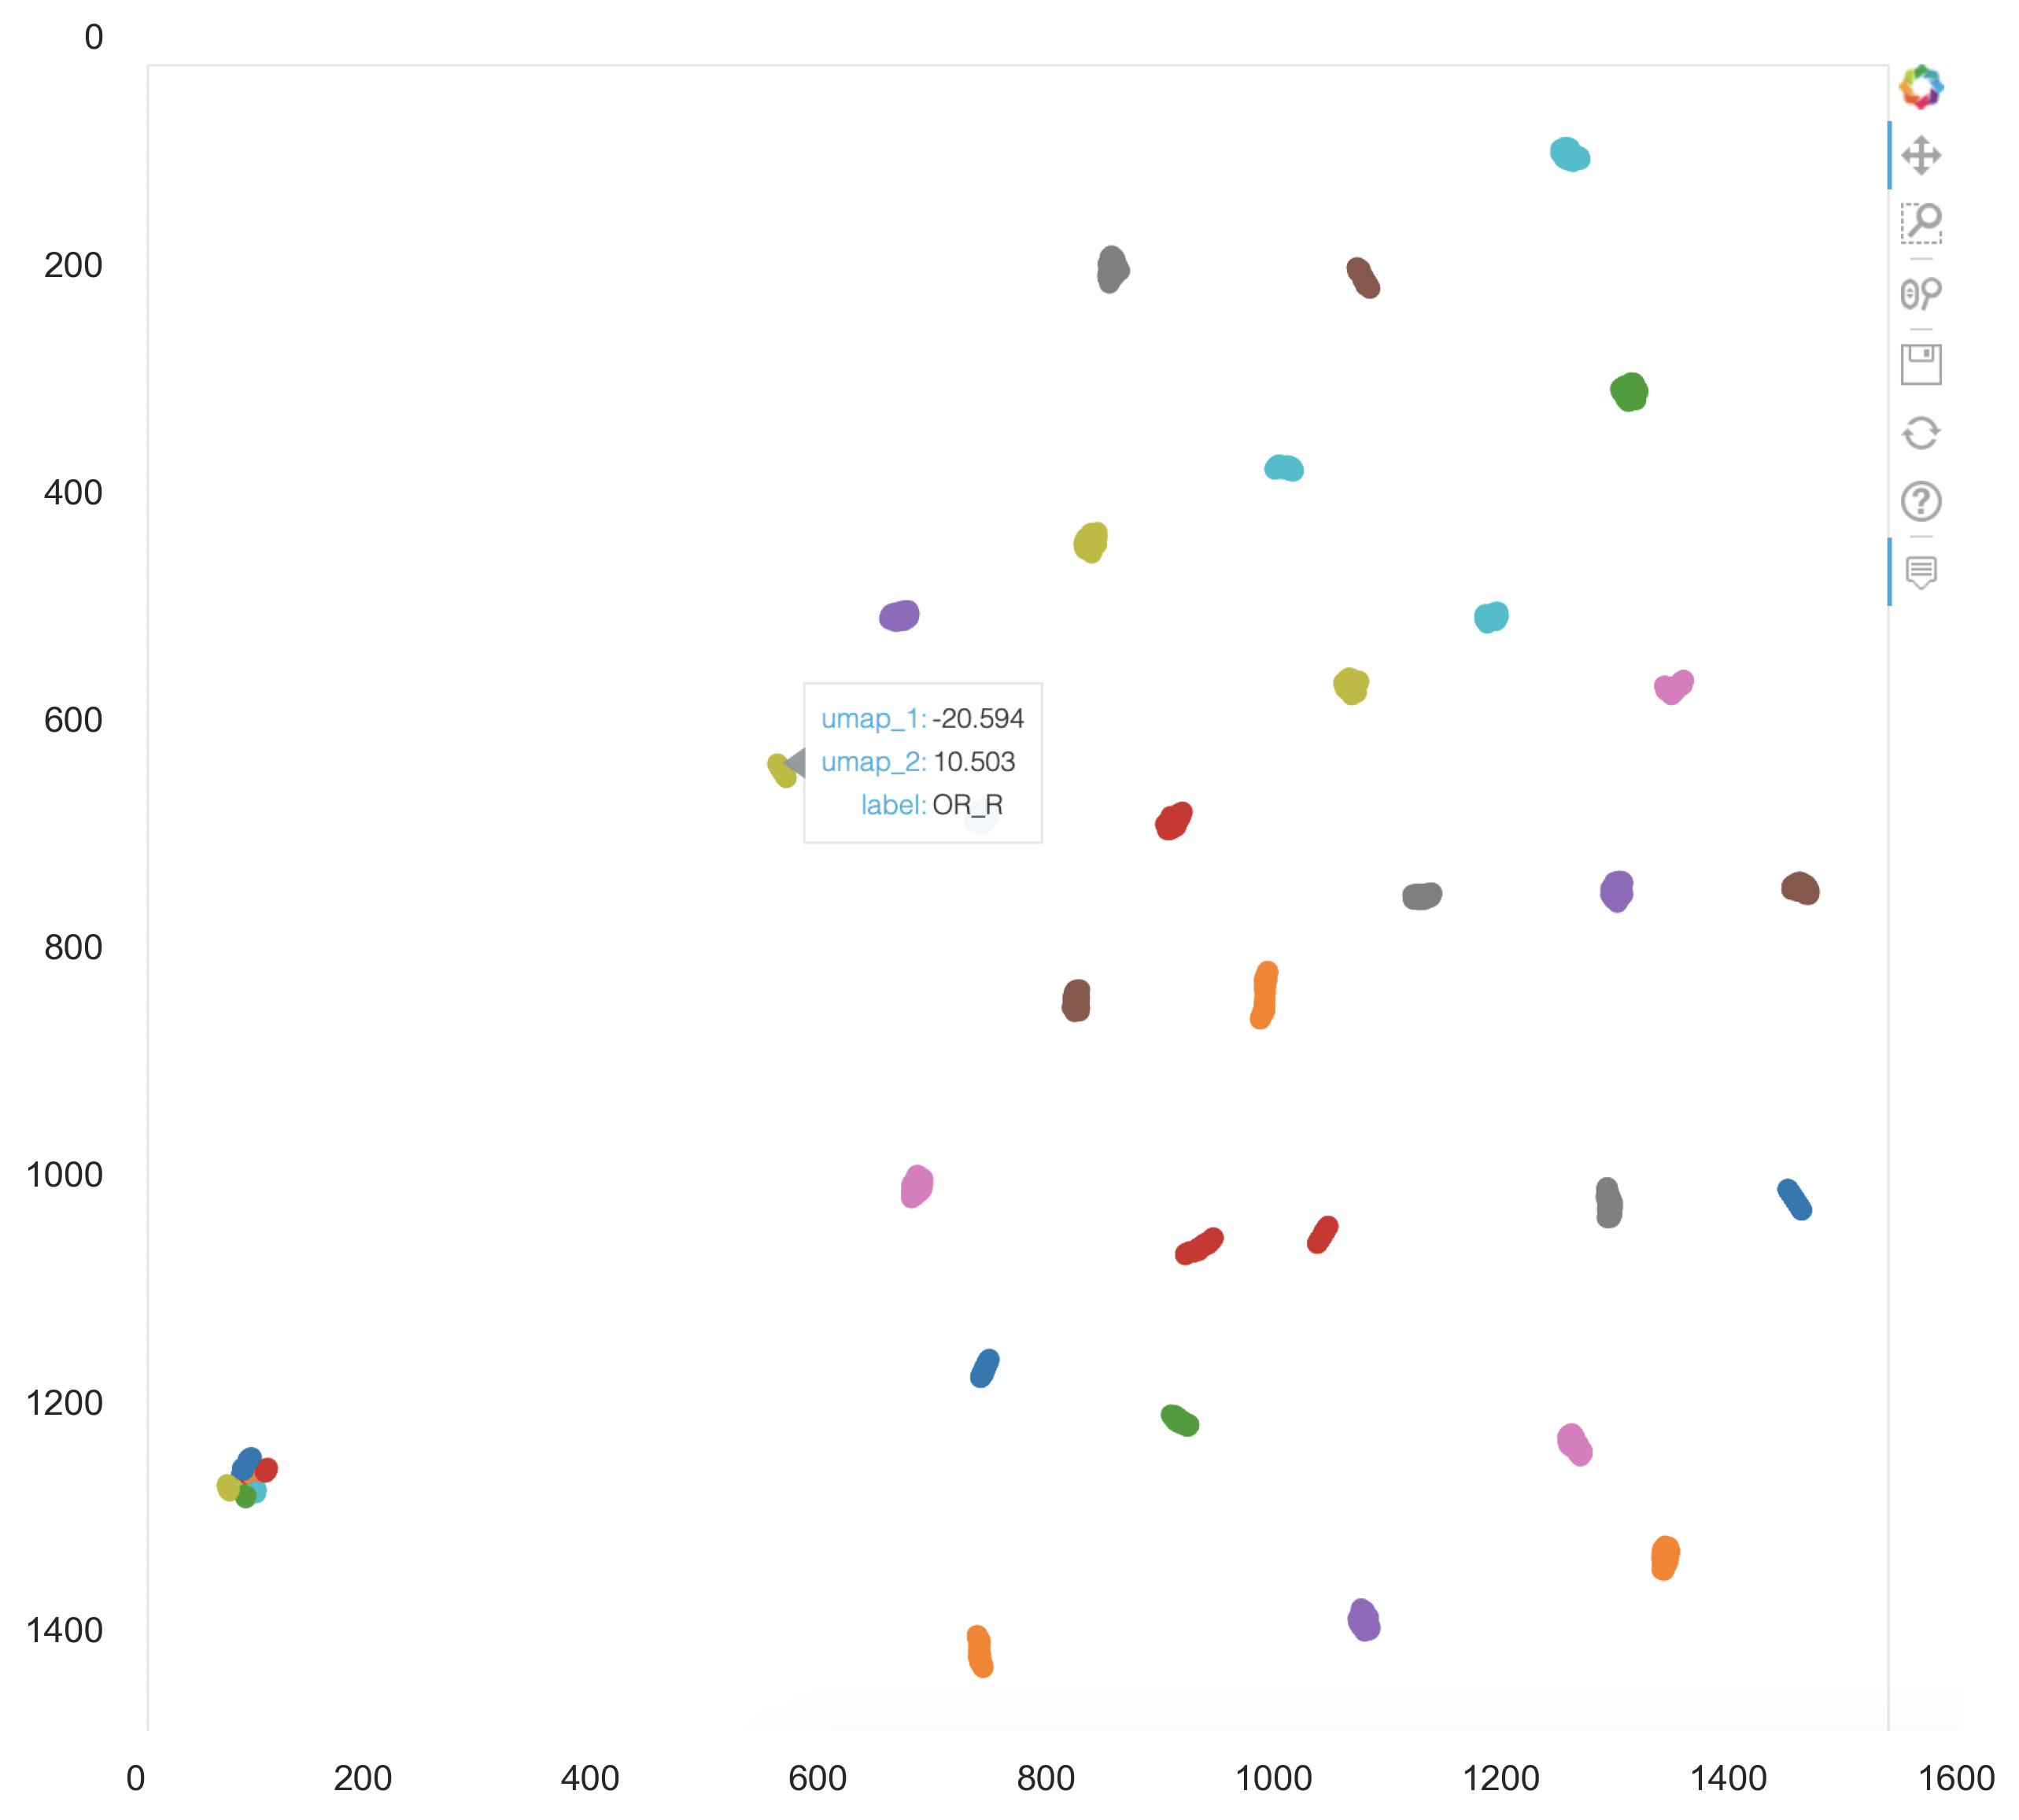

In [98]:
fname="all_clusters.png"
im = plt.imread(fname)
plt.figure(figsize=(10,10), dpi=300)
plt.imshow(im)
plt.grid(None)

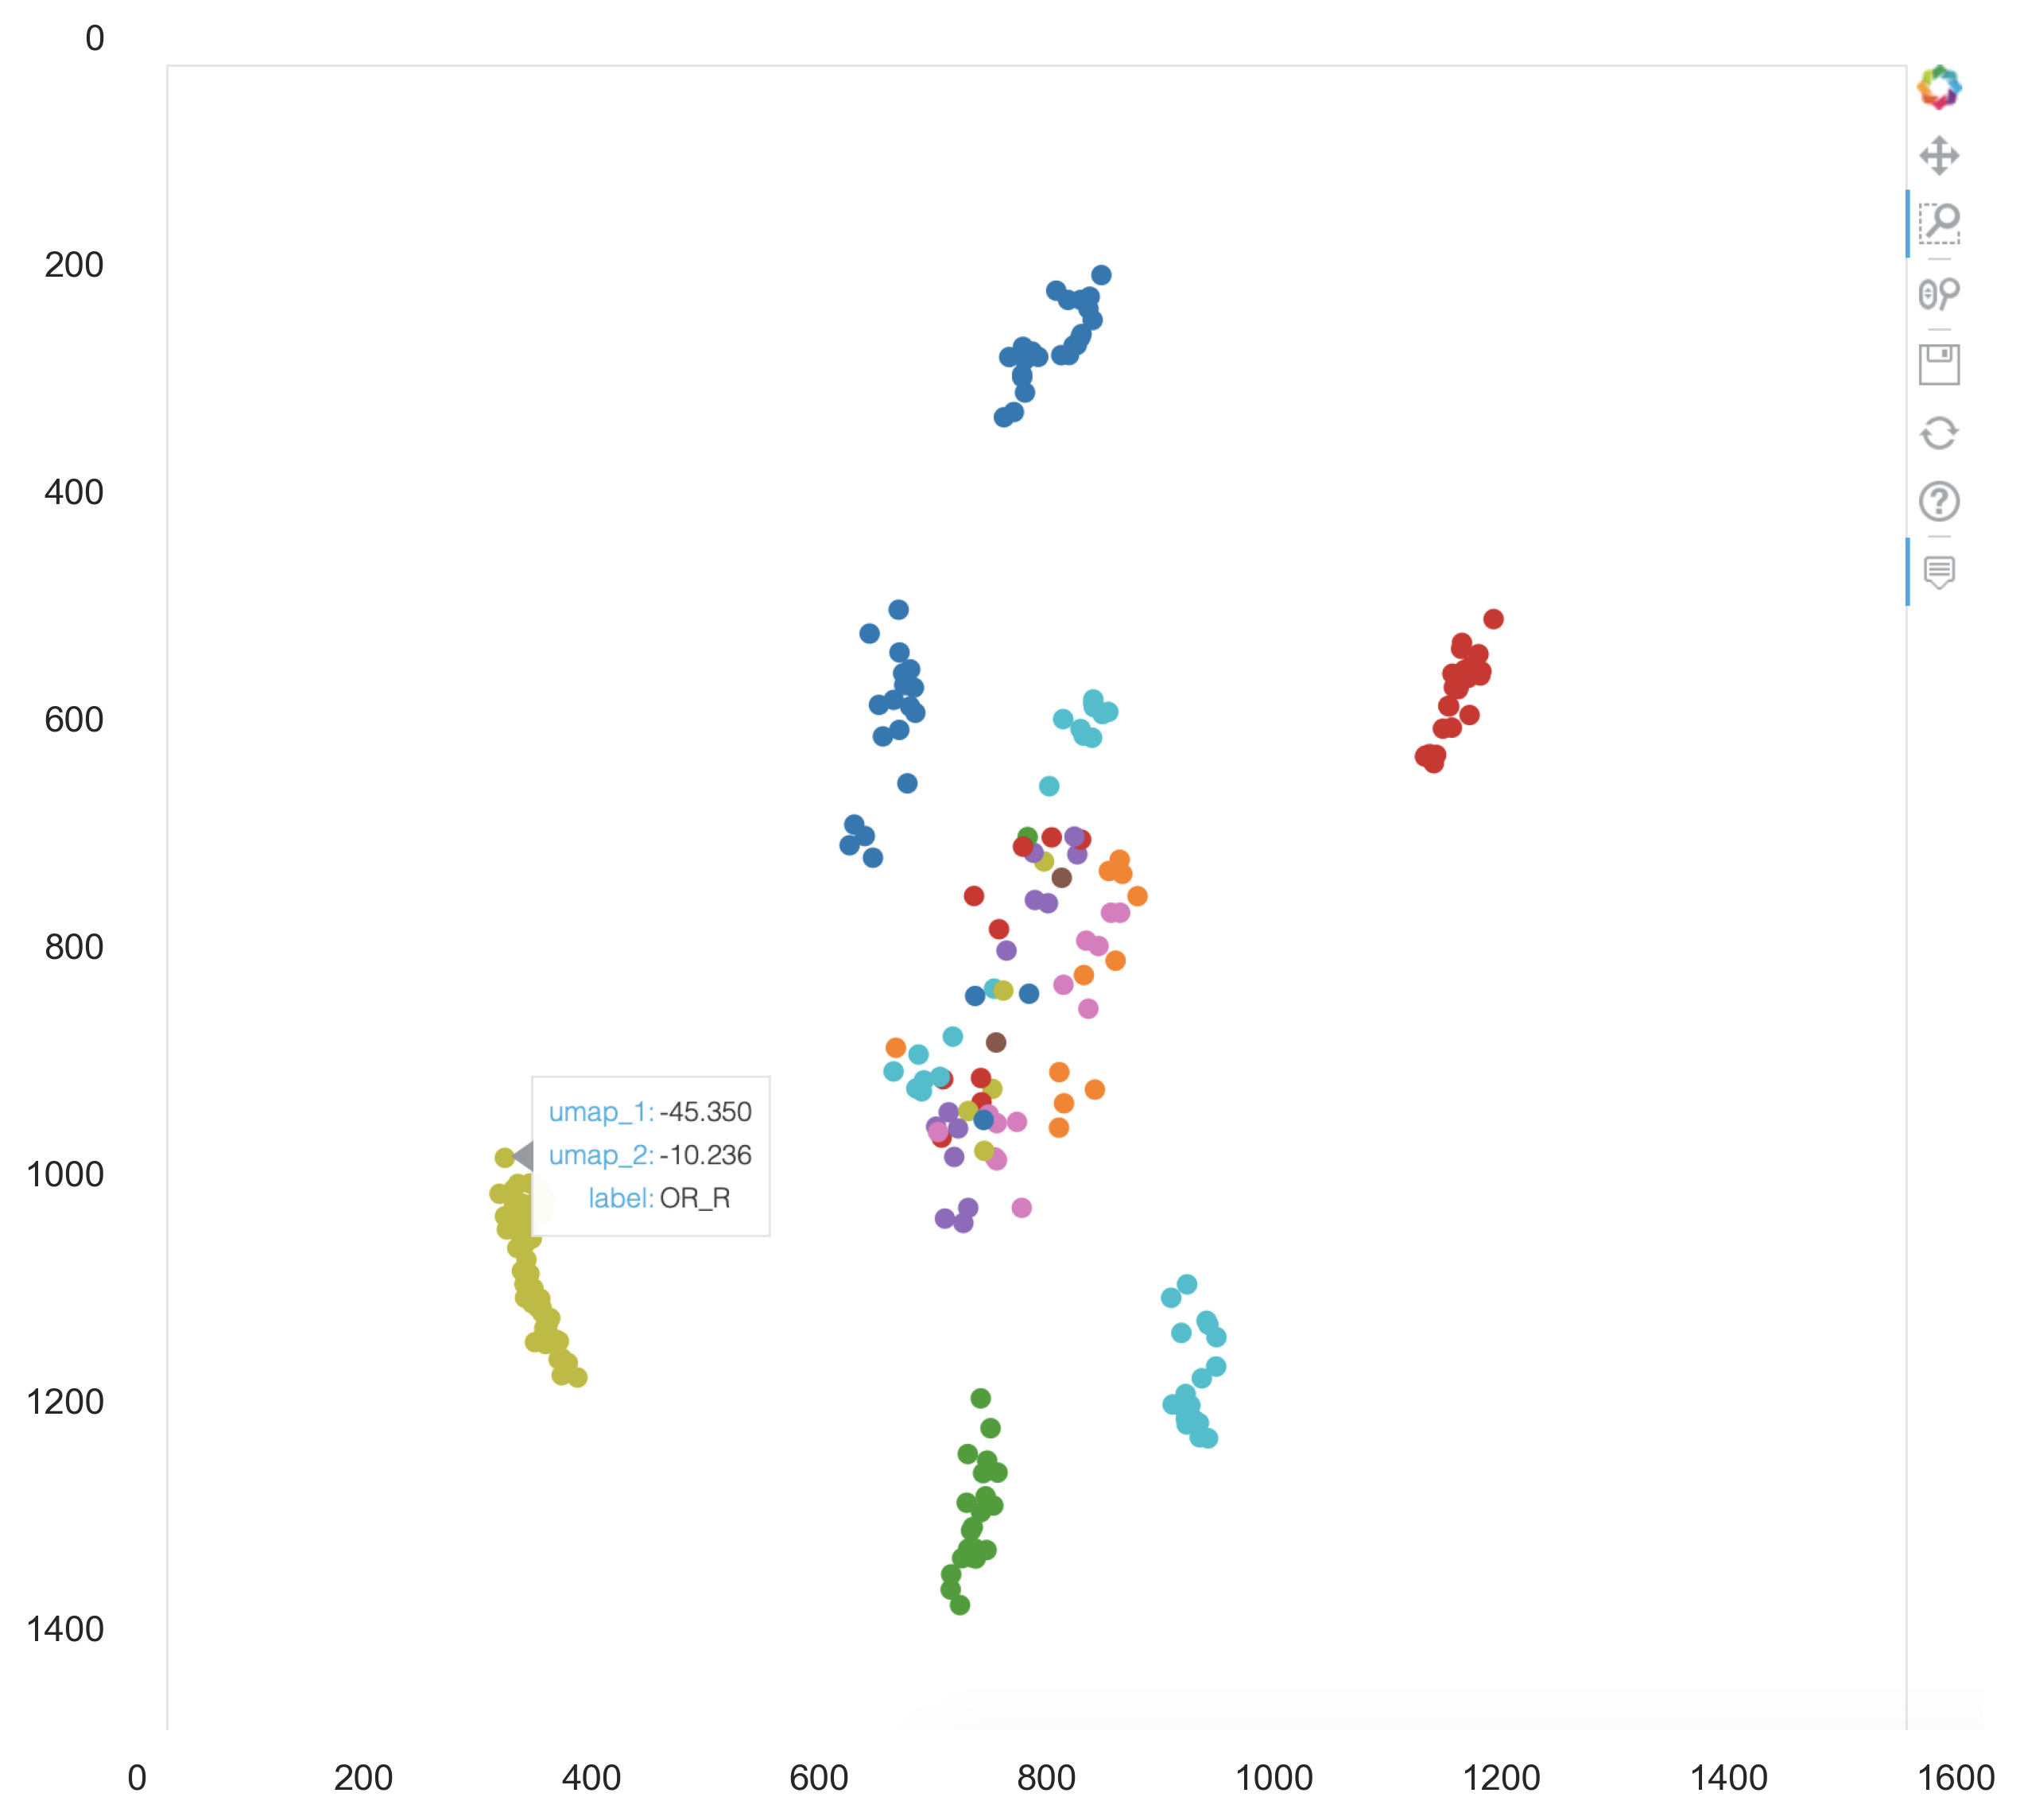

In [99]:
fname="sub_OR_R.png"
im = plt.imread(fname)
plt.figure(figsize=(10,10), dpi=300)
plt.imshow(im)
plt.grid(None)

<font size=4 color='brown'> We find subclusters within it

In [114]:
bundles[23]

'OR_R.trk'

In [115]:
k = 23
or_r = []
for i in range(141):
    
    or_r.append(densmap_supervised[k])
    k = k+30
    
or_r = np.array(or_r)

lb_c = np.array(range(0,141))
l_c = ['OR_R']*141

In [116]:
df = pd.DataFrame({'umap_1': or_r[:,0],
                   'umap_2': or_r[:,1],
                   'label': l_c})

<font size=4 color='brown'> Two OR_R clusters. The top one is the regular cluster and bottom one is the one blaced inside mixed cluster.

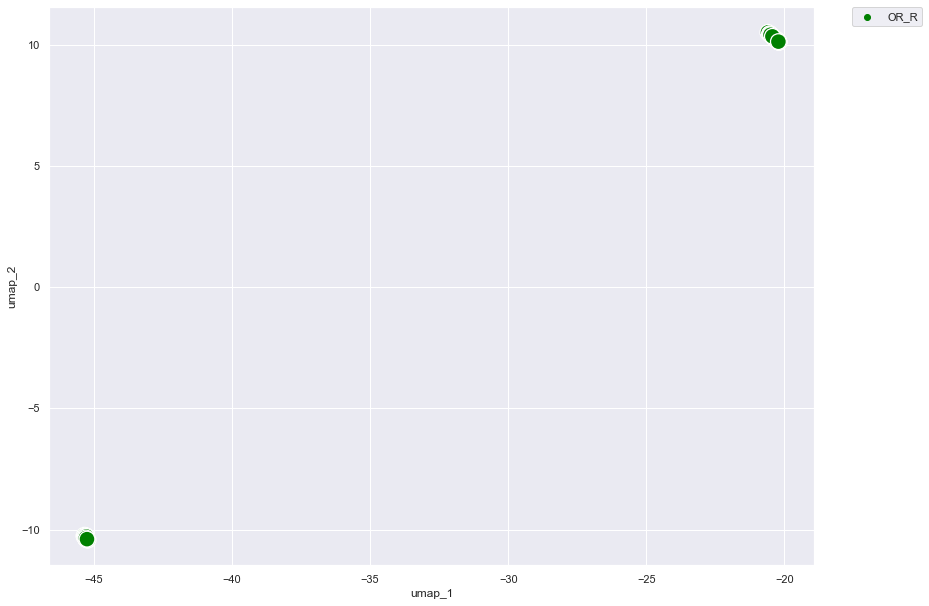

In [117]:
g = sns.scatterplot(data=df, x="umap_1", y="umap_2", hue="label", s=250, palette=['green'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [118]:
sub_info = pd.read_csv("~/Desktop/buan_usc/adni/sub_info.csv")
all_subs = []

for sb in files:
    all_subs.append(sb[9:40])

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(or_r)

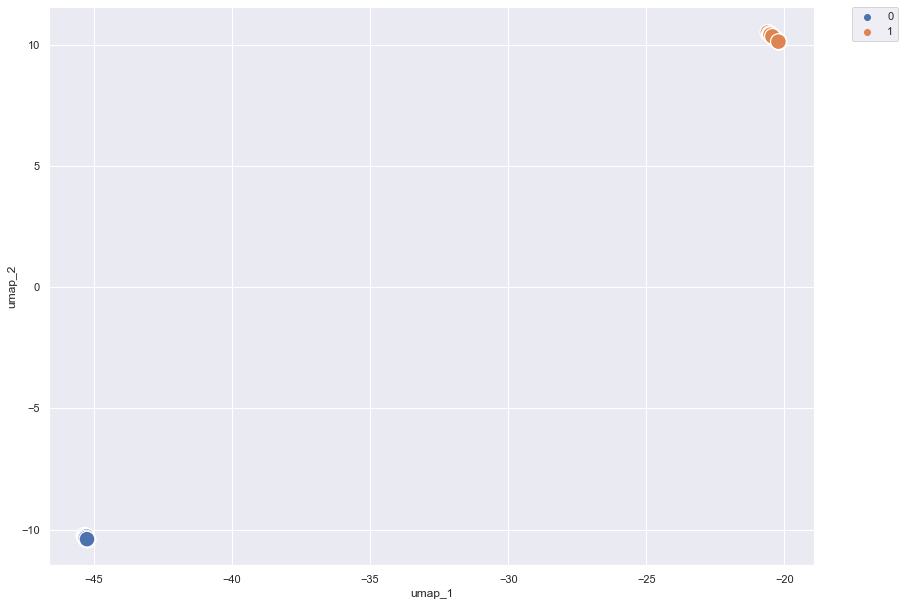

In [119]:
df = pd.DataFrame({'umap_1': or_r[:,0],
                   'umap_2': or_r[:,1],
                   'label': kmeans.labels_})

g = sns.scatterplot(data=df, x="umap_1", y="umap_2", hue="label", s=250)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [108]:
kl = kmeans.labels_ == 1
all_subs = np.array(all_subs)[kl]

In [109]:
group = []
for sub in all_subs:
    
    group.append(np.array(sub_info[sub_info['Subject']==sub]['DX'])[0])

In [110]:
group = np.array(group)
c_lb = []

for i in group:
    
    if i=='Dementia':
        c_lb.append('red')
        
    if i=='MCI':
        c_lb.append('coral')
        
    if i=='CN':
        
        c_lb.append('green')

<font size=4 color='brown'> We can further examine two clusters of OR_R bundles based on group and sex of the subjects.

<font size=4 color='purple'> Regular OR_R cluster.

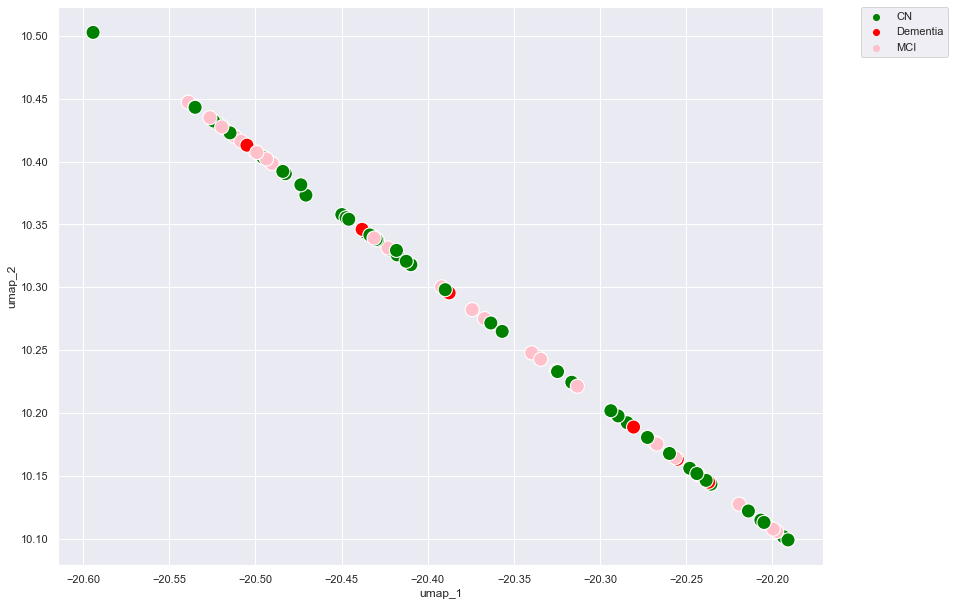

In [111]:
or_r2 = or_r[kl]
lll = ['OR_R']*len(or_r2)
df2 = pd.DataFrame({'umap_1': or_r2[:,0],
                   'umap_2': or_r2[:,1],
                   'label': group})

colors = {'Dementia' : 'red', 'MCI' : 'pink', 'CN' : 'green'}
g = sns.scatterplot(data=df2, x="umap_1", y="umap_2", hue="label", s=200,  palette=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [112]:
sex = []
for sub in all_subs:
    
    sex.append(np.array(sub_info[sub_info['Subject']==sub]['Sex'])[0])

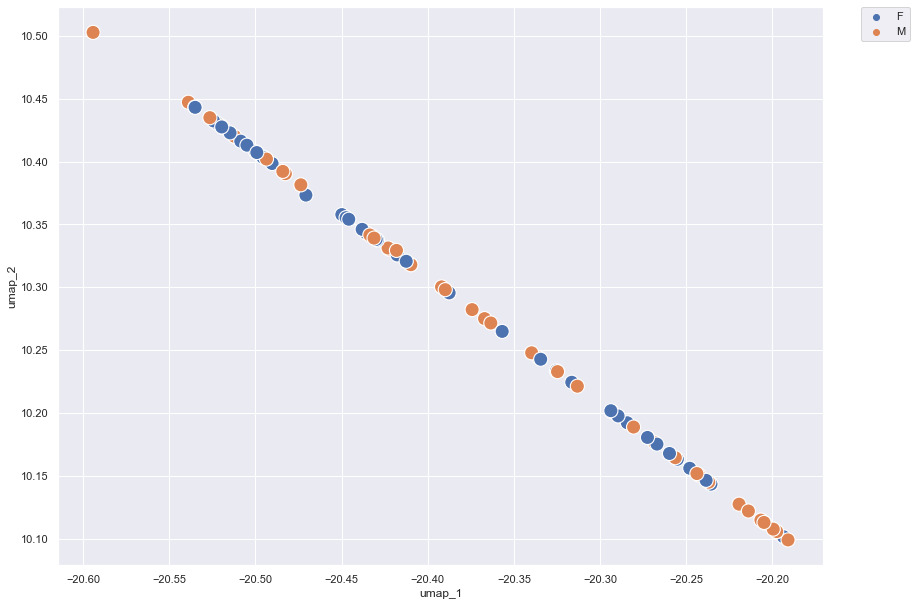

In [113]:
or_r2 = or_r[kl]
lll = ['OR_L']*len(or_r2)
df2 = pd.DataFrame({'umap_1': or_r2[:,0],
                   'umap_2': or_r2[:,1],
                   'label': sex})

g = sns.scatterplot(data=df2, x="umap_1", y="umap_2", hue="label", s=200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [120]:
k2 = kmeans.labels_ == 0
all_subs = np.array(all_subs)[k2]

group = []
for sub in all_subs:
    
    group.append(np.array(sub_info[sub_info['Subject']==sub]['DX'])[0])
    
group = np.array(group)
c_lb = []

for i in group:
    
    if i=='Dementia':
        c_lb.append('red')
        
    if i=='MCI':
        c_lb.append('coral')
        
    if i=='CN':
        
        c_lb.append('green')
        


<font size=4 color='purple'> Mixed/outlier OR_R cluster

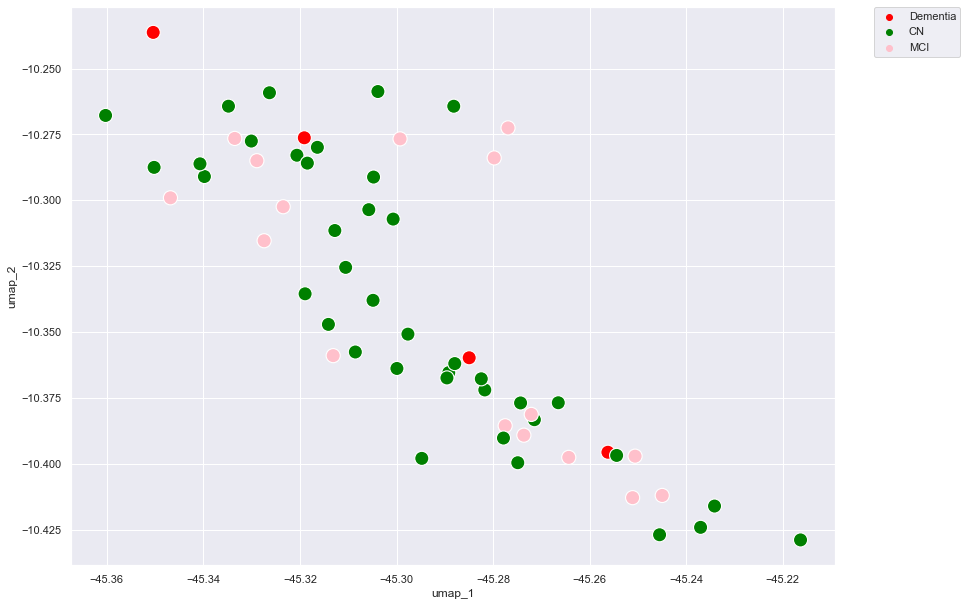

In [122]:
or_r2 = or_r[k2]
lll = ['OR_R']*len(or_r2)
df2 = pd.DataFrame({'umap_1': or_r2[:,0],
                   'umap_2': or_r2[:,1],
                   'label': group})

colors = {'Dementia' : 'red', 'MCI' : 'pink', 'CN' : 'green'}
g = sns.scatterplot(data=df2, x="umap_1", y="umap_2", hue="label", s=200,  palette=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [123]:
sex = []
for sub in all_subs:
    
    sex.append(np.array(sub_info[sub_info['Subject']==sub]['Sex'])[0])

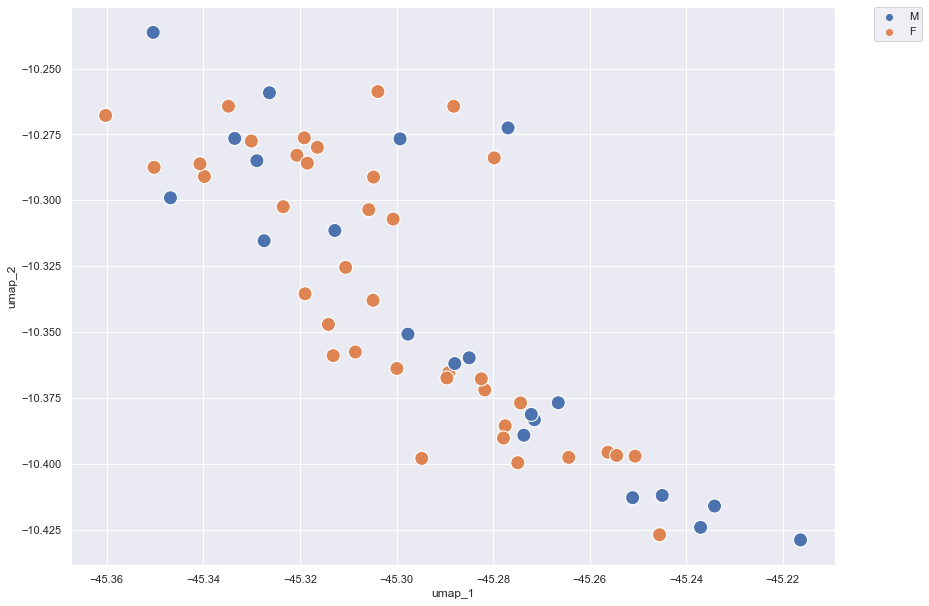

In [124]:
or_r2 = or_r[k2]
lll = ['OR_L']*len(or_r2)
df2 = pd.DataFrame({'umap_1': or_r2[:,0],
                   'umap_2': or_r2[:,1],
                   'label': sex})

g = sns.scatterplot(data=df2, x="umap_1", y="umap_2", hue="label", s=200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

References

[1] Zavaliangos-Petropulu, A., Nir, T.M., Thomopoulos, S.I., Reid, R.I., Bernstein, M.A., Borowski, B., Jack Jr, C.R., Weiner, M.W., Jahanshad, N. and Thompson, P.M., 2019. Diffusion MRI indices and their relation to cognitive impairment in brain aging: the updated multi-protocol approach in ADNI3. Frontiers in Neuroinformatics, 13, p.2.

[2] Garyfallidis, E., Ocegueda, O., Wassermann, D. and Descoteaux, M., 2015. Robust and efficient linear registration of white-matter fascicles in the space of streamlines. NeuroImage, 117, pp.124-140.

[3] McInnes, L., Healy, J. and Melville, J., 2018. Umap: Uniform manifold approximation and projection for dimension reduction. arXiv preprint arXiv:1802.03426.